In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# scaler for easier understanding
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
# dendogram for kmeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
# dimension reduction
from sklearn.decomposition import PCA
# visualization
import visuals as vs

In [343]:
df = pd.read_csv('WorkDB-28.02.25.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)

In [344]:
df.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,Paris,Rome,1,1,15:45,2025-03-01,17:50,10:05,2025-03-02,12:20,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
1,Paris,Rome,1,1,7:40,2025-03-01,9:45,19:55,2025-03-02,11:40,...,1,760,MPL,1,0,1247,2025-02-28,Momondo,125,945
2,Paris,Rome,1,1,15:45,2025-03-01,17:50,6:00,2025-03-02,8:15,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
3,Paris,Rome,1,1,6:55,2025-03-01,9:00,10:05,2025-03-02,12:20,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135
4,Paris,Rome,1,1,6:55,2025-03-01,9:00,6:00,2025-03-02,8:15,...,0,0,NaN,1,0,1332,2025-02-28,Momondo,125,135


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  datetime64[ns]
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  datetime64[ns]
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [346]:
df.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,179504.000000,179504.000000,179504,179504,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504.000000,179504,179504.000000,179504.000000
mean,15.223204,3.003148,2025-03-15 05:21:24.820394496,2025-03-18 05:25:56.769765376,0.010178,1.318160,0.010289,1.328271,0.111697,0.097151,576.385813,2025-02-28 00:00:00,124.749337,124.729354
min,1.000000,1.000000,2025-03-01 00:00:00,2025-03-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,2025-02-28 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-08 00:00:00,2025-03-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,390.000000,2025-02-28 00:00:00,80.000000,80.000000
50%,15.000000,3.000000,2025-03-15 00:00:00,2025-03-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541.000000,2025-02-28 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-23 00:00:00,2025-03-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000,2025-02-28 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-03-30 00:00:00,2025-04-04 00:00:00,2.000000,1870.000000,1.000000,1355.000000,1.000000,2.000000,2509.000000,2025-02-28 00:00:00,2165.000000,1635.000000
std,8.713007,1.414732,NaN,NaN,0.100483,21.731453,0.100914,21.184835,0.314994,0.297328,258.456373,NaN,44.470720,44.312308


In [347]:
# filtering the rows where the onward and return airlines are the same (.copy() is to create an independent copy of the dataframe so that it doesn't affect the original dataframe)
df_filtered = df[df['Onward Airlines'] == df['Return Airlines']].copy()

In [348]:
# taking only the columns that we think can help decide the pricing policy
df_filtered = df_filtered[["Price(NIS)", "Onward Airlines", "TTT", "LOS", "Departure Time", "Arrival Time",
                           "Return Departure Time", "Return Arrival Time", "Checked Bags", "Carry-ons",
                            "Onward Flight Connections", "Return Flight Connections",
                            "Total Onward Flight Duration(min)", "Total Return Flight Duration(min)"]]
# changing the name
df_filtered.rename(columns={'Onward Airlines': 'Airline'}, inplace=True)

# converting the time to datetime format instead of string for categorization
df_filtered['Departure Time'] = pd.to_datetime(df_filtered['Departure Time'], format='%H:%M').dt.time
df_filtered['Arrival Time'] = df_filtered['Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Arrival Time'] = pd.to_datetime(df_filtered['Arrival Time'], format='%H:%M').dt.time
df_filtered['Return Departure Time'] = pd.to_datetime(df_filtered['Return Departure Time'], format='%H:%M').dt.time
df_filtered['Return Arrival Time'] = df_filtered['Return Arrival Time'].str.extract(r'(\d{2}:\d{2})')[0]
df_filtered['Return Arrival Time'] = pd.to_datetime(df_filtered['Return Arrival Time'], format='%H:%M').dt.time

In [349]:
# categorizing the time into Morning, Noon, Evening, Night
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Noon'
    else:
        return 'Evening'

In [350]:
# conveting the departure time to categories (non-ordinal(nominal) so used dummies)
df_filtered['Departure Time Category'] = df_filtered['Departure Time'].apply(categorize_time)
df_filtered['Arrival Time Category'] = df_filtered['Arrival Time'].apply(categorize_time)
df_filtered['Return Departure Time Category'] = df_filtered['Return Departure Time'].apply(categorize_time)
df_filtered['Return Arrival Time Category'] = df_filtered['Return Arrival Time'].apply(categorize_time)

# dropping the original departure time column
df_filtered.drop('Departure Time', axis=1, inplace=True)
df_filtered.drop('Arrival Time', axis=1, inplace=True)
df_filtered.drop('Return Departure Time', axis=1, inplace=True)
df_filtered.drop('Return Arrival Time', axis=1, inplace=True)

# creating dummies for the categorical column
df_filtered = pd.get_dummies(df_filtered, columns=["Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Arrival Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Departure Time Category"])
df_filtered = pd.get_dummies(df_filtered, columns=["Return Arrival Time Category"])

In [351]:
df_filtered.head()

,Price(NIS),Airline,TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min),...,Arrival Time Category_Night,Arrival Time Category_Noon,Return Departure Time Category_Evening,Return Departure Time Category_Morning,Return Departure Time Category_Night,Return Departure Time Category_Noon,Return Arrival Time Category_Evening,Return Arrival Time Category_Morning,Return Arrival Time Category_Night,Return Arrival Time Category_Noon
0,1332,Air France,1,1,0,1,0,0,125,135,...,False,True,False,True,False,False,False,False,False,True
1,1247,Transavia France,1,1,0,1,0,1,125,945,...,False,False,True,False,False,False,False,True,False,False
2,1332,Air France,1,1,0,1,0,0,125,135,...,False,True,False,True,False,False,True,False,False,False
3,1332,Air France,1,1,0,1,0,0,125,135,...,False,False,False,True,False,False,False,False,False,True
4,1332,Air France,1,1,0,1,0,0,125,135,...,False,False,False,True,False,False,True,False,False,False


In [352]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85513 entries, 0 to 179483
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Price(NIS)                              85513 non-null  int64 
 1   Airline                                 85513 non-null  object
 2   TTT                                     85513 non-null  int64 
 3   LOS                                     85513 non-null  int64 
 4   Checked Bags                            85513 non-null  int64 
 5   Carry-ons                               85513 non-null  int64 
 6   Onward Flight Connections               85513 non-null  int64 
 7   Return Flight Connections               85513 non-null  int64 
 8   Total Onward Flight Duration(min)       85513 non-null  int64 
 9   Total Return Flight Duration(min)       85513 non-null  int64 
 10  Departure Time Category_Evening         85513 non-null  bool  
 11  Depart

In [353]:
df_filtered.value_counts()

Price(NIS)  Airline          TTT  LOS  Checked Bags  Carry-ons  Onward Flight Connections  Return Flight Connections  Total Onward Flight Duration(min)  Total Return Flight Duration(min)  Departure Time Category_Evening  Departure Time Category_Morning  Departure Time Category_Night  Departure Time Category_Noon  Arrival Time Category_Evening  Arrival Time Category_Morning  Arrival Time Category_Night  Arrival Time Category_Noon  Return Departure Time Category_Evening  Return Departure Time Category_Morning  Return Departure Time Category_Night  Return Departure Time Category_Noon  Return Arrival Time Category_Evening  Return Arrival Time Category_Morning  Return Arrival Time Category_Night  Return Arrival Time Category_Noon
914         British Airways  1    2    0             1          0                          0                          155                                165                                True                             False                            False      

In [354]:
# checking for airlines with less than 1% of the data
airlines_data = df_filtered.groupby('Airline', observed=True)

In [355]:
airlines_data.describe()

Price(NIS)                                           \
                           count         mean         std     min     25%   
Airline                                                                     
Air France                7586.0   851.589639  298.167013   424.0   655.0   
Austrian Airlines            1.0  1099.000000         NaN  1099.0  1099.0   
British Airways           3044.0   891.395204  241.510035   435.0   736.0   
ITA Airways               4169.0   837.912449  280.988850   467.0   692.0   
Iberia                     227.0   844.088106  340.982224   520.0   592.0   
Jet2                       161.0   680.472050  166.548306   418.0   581.0   
KLM                          1.0  1617.000000         NaN  1617.0  1617.0   
Lufthansa                    2.0  1169.000000    0.000000  1169.0  1169.0   
Ryanair                  15552.0   543.843107  230.131833   189.0   374.0   
Scandinavian Airlines        5.0   884.800000   35.372306   836.0   884.0   
Transavia France          1225.0   690.466939  210.518545   354.0   559.0   
Vueling                  13875.0   552.671495  251.353568   126.0   356.0   
Wizz Air                  5325.0   542.656901  214.822835   133.0   396.0   
easyJet                  34340.0   455.070443  196.201744   122.0   312.0   

                                                    TTT             ...  \
                          50%      75%     max    count       mean  ...   
Airline                                                             ...   
Air France              766.0   921.00  2416.0   7586.0  12.675191  ...   
Austrian Airlines      1099.0  1099.00  1099.0      1.0  20.000000  ...   
British Airways         847.0   983.25  2046.0   3044.0  12.190210  ...   
ITA Airways             770.0   870.00  2509.0   4169.0  14.757976  ...   
Iberia                  736.0   963.50  2050.0    227.0  12.215859  ...   
Jet2                    633.0   730.00  1228.0    161.0  16.124224  ...   
KLM                    1617.0  1617.00  1617.0      1.0   1.000000  ...   
Lufthansa              1169.0  1169.00  1169.0      2.0  13.000000  ...   
Ryanair                 502.0   657.25  1913.0  15552.0  15.632330  ...   
Scandinavian Airlines   884.0   884.00   936.0      5.0   1.800000  ...   
Transavia France        640.0   736.00  1532.0   1225.0  16.607347  ...   
Vueling                 538.0   680.00  1980.0  13875.0  15.583712  ...   
Wizz Air                511.0   635.00  2146.0   5325.0  16.126573  ...   
easyJet                 405.0   562.00  2035.0  34340.0  14.730693  ...   

                      Total Onward Flight Duration(min)          \
                                                    75%     max   
Airline                                                           
Air France                                        130.0   285.0   
Austrian Airlines                                 290.0   290.0   
British Airways                                   165.0   180.0   
ITA Airways                                       135.0   340.0   
Iberia                                            170.0   170.0   
Jet2                                              160.0   160.0   
KLM                                               315.0   315.0   
Lufthansa                                         297.5   300.0   
Ryanair                                           165.0  1525.0   
Scandinavian Airlines                             335.0   435.0   
Transavia France                                  135.0   135.0   
Vueling                                           135.0   675.0   
Wizz Air                                          170.0  1635.0   
easyJet                                            80.0   380.0   

                      Total Return Flight Duration(min)              \
                                                  count        mean   
Airline                                                               
Air France                                       7586.0  127.914579   
Austrian Air

In [356]:
grouped = airlines_data['Airline'].value_counts().reset_index()
grouped.columns = ['Airline', 'Count']
grouped

,Airline,Count
0,Air France,7586
1,Austrian Airlines,1
2,British Airways,3044
3,ITA Airways,4169
4,Iberia,227
5,Jet2,161
6,KLM,1
7,Lufthansa,2
8,Ryanair,15552
9,Scandinavian Airlines,5


In [357]:
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

,Airline,Count,Percentage
0,Air France,7586,8.871166
1,Austrian Airlines,1,0.001169
2,British Airways,3044,3.559693
3,ITA Airways,4169,4.875282
4,Iberia,227,0.265457
5,Jet2,161,0.188275
6,KLM,1,0.001169
7,Lufthansa,2,0.002339
8,Ryanair,15552,18.186708
9,Scandinavian Airlines,5,0.005847


In [358]:
# if the percentage is less than 1, then we will group them into 'Others' for the following pie chart, and drop the airline from the dataframe
others_count = 0
others_percentage = 0
for i in range(len(grouped)):
    if grouped['Percentage'][i] < 1:
        others_count += grouped['Count'][i]
        others_percentage += grouped['Percentage'][i]
        
        # removeing the airline from the dataframe
        df_filtered = df_filtered[df_filtered['Airline'] != grouped['Airline'][i]]

        grouped = grouped.drop(i)
others = pd.DataFrame({'Airline': ['Others'], 'Count': [others_count], 'Percentage': [others_percentage]})
grouped = pd.concat([grouped, others], ignore_index=True)

grouped

,Airline,Count,Percentage
0,Air France,7586,8.871166
1,British Airways,3044,3.559693
2,ITA Airways,4169,4.875282
3,Ryanair,15552,18.186708
4,Transavia France,1225,1.432531
5,Vueling,13875,16.225603
6,Wizz Air,5325,6.227123
7,easyJet,34340,40.157637
8,Others,397,0.464257


In [359]:
len(grouped)

9

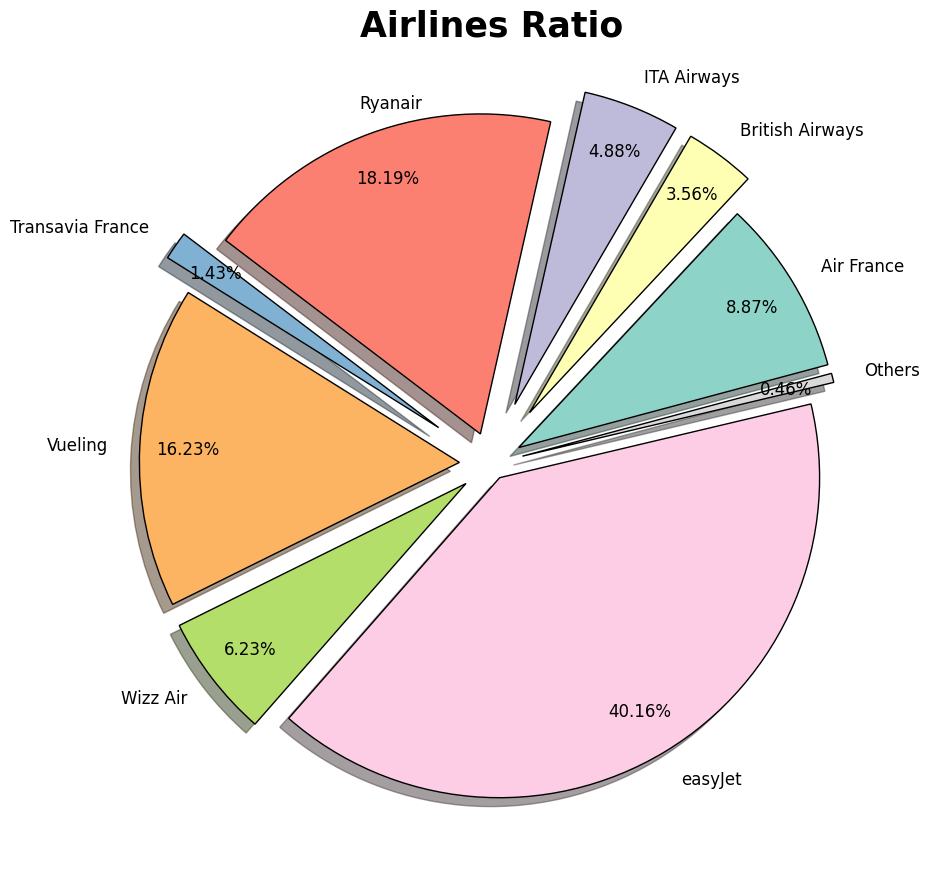

In [360]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
airlines = grouped['Airline']
count = grouped['Count']
plt.title('Airlines Ratio', fontsize=25, fontweight='bold', pad=20)
ax.pie(count, labels = airlines, autopct='%1.2f%%', shadow=True, startangle=15, explode=(0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.05, 0.1), textprops={'fontsize': 12}
       , colors = sns.color_palette('Set3', 9), wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, labeldistance=1.1, center=(0.5, 0.5))
plt.show()

In [361]:
# checking the correlation between the features and the price:
corr_test_df = df_filtered.copy()
corr_test_df.drop('Airline', axis=1, inplace=True)
correlation = corr_test_df.corr()
print(correlation['Price(NIS)'])

Price(NIS)                                1.000000
TTT                                      -0.272479
LOS                                      -0.011752
Checked Bags                              0.050665
Carry-ons                                 0.431884
Onward Flight Connections                 0.057282
Return Flight Connections                 0.072941
Total Onward Flight Duration(min)         0.311412
Total Return Flight Duration(min)         0.310861
Departure Time Category_Evening           0.051766
Departure Time Category_Morning          -0.005799
Departure Time Category_Night            -0.025292
Departure Time Category_Noon             -0.034460
Arrival Time Category_Evening             0.078081
Arrival Time Category_Morning            -0.040589
Arrival Time Category_Night              -0.010810
Arrival Time Category_Noon               -0.050519
Return Departure Time Category_Evening    0.021347
Return Departure Time Category_Morning   -0.001908
Return Departure Time Category_

In [362]:
'''features to keep an eye on:
- Total Onward Flight Duration(min)
- Total Return Flight Duration(min)
- TTT
- Carry-ons'''

'features to keep an eye on:\n- Total Onward Flight Duration(min)\n- Total Return Flight Duration(min)\n- TTT\n- Carry-ons'

c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\galha\AppData\Local\Programs\Python\Python313\Lib\site-p

<Figure size 1200x800 with 0 Axes>

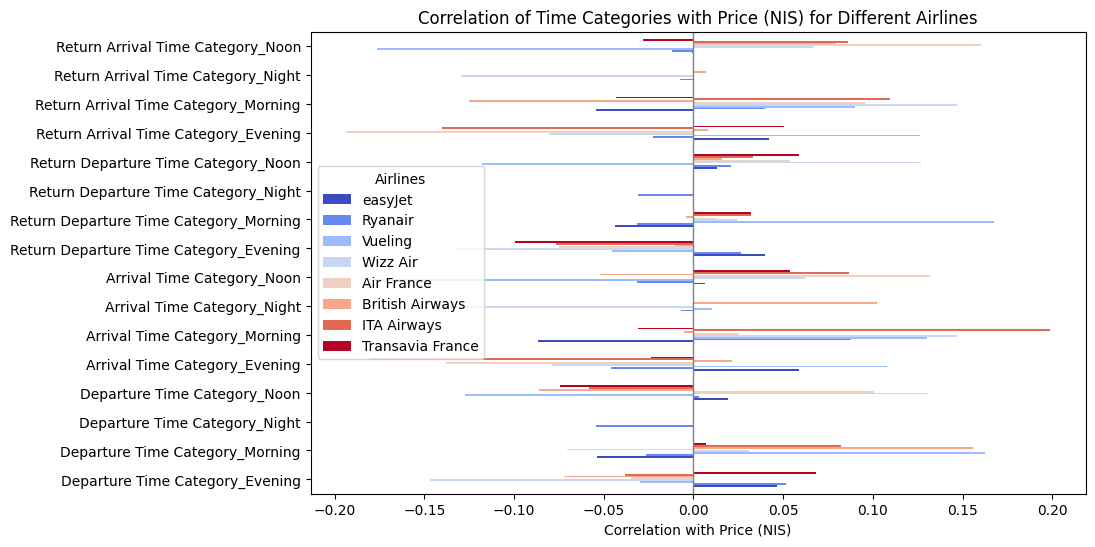

In [363]:
# checking specificaly if the time categories have any correlation with the price
time_caregory_feats = [
    'Departure Time Category_Evening', 'Departure Time Category_Morning', 'Departure Time Category_Night',
    'Departure Time Category_Noon', 'Arrival Time Category_Evening', 'Arrival Time Category_Morning',
    'Arrival Time Category_Night', 'Arrival Time Category_Noon', 'Return Departure Time Category_Evening',
    'Return Departure Time Category_Morning', 'Return Departure Time Category_Night', 'Return Departure Time Category_Noon',
    'Return Arrival Time Category_Evening', 'Return Arrival Time Category_Morning', 'Return Arrival Time Category_Night',
    'Return Arrival Time Category_Noon'
]

# Function to calculate correlation for a specific airline with specific features
def calculate_correlation(airline, features):
    df_airline = corr_test_df[df_filtered['Airline'] == airline]
    return df_airline[features].corrwith(df_airline['Price(NIS)'])

# Calculate the correlations for each airline and store them
airlines = ['easyJet', 'Ryanair', 'Vueling', 'Wizz Air', 'Air France', 'British Airways', 'ITA Airways', 'Transavia France']
correlations_dict = {}

for airline in airlines:
    correlations_dict[airline] = calculate_correlation(airline, time_caregory_feats)

# Convert the dictionary into a DataFrame for easy visualization
correlation_df = pd.DataFrame(correlations_dict)

# Plot the correlations for each feature
plt.figure(figsize=(12, 8))
correlation_df.plot(kind='barh', figsize=(10, 6), cmap='coolwarm')
plt.xlabel('Correlation with Price (NIS)')
plt.title('Correlation of Time Categories with Price (NIS) for Different Airlines')
plt.axvline(0, color='gray', linewidth=1)  # Highlight 0 correlation line
plt.legend(title='Airlines')
plt.show()

In [364]:
'''the corr for these features are very low, so the pricing policy isn't too affected by the times of the flights'''

"the corr for these features are very low, so the pricing policy isn't too affected by the times of the flights"

In [365]:
# Drop all columns that were created by one-hot encoding
corr_test_df = corr_test_df.loc[:, ~corr_test_df.columns.str.startswith('Departure Time') & 
                                         ~corr_test_df.columns.str.startswith('Arrival Time') & 
                                         ~corr_test_df.columns.str.startswith('Return Departure Time') &
                                         ~corr_test_df.columns.str.startswith('Return Arrival Time')]
corr_test_df

,Price(NIS),TTT,LOS,Checked Bags,Carry-ons,Onward Flight Connections,Return Flight Connections,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,1332,1,1,0,1,0,0,125,135
1,1247,1,1,0,1,0,1,125,945
2,1332,1,1,0,1,0,0,125,135
3,1332,1,1,0,1,0,0,125,135
4,1332,1,1,0,1,0,0,125,135
...,...,...,...,...,...,...,...,...,...
179453,363,5,3,0,0,0,0,150,175
179458,528,5,3,0,0,0,0,150,165
179460,559,5,3,0,0,0,0,150,165
179476,573,5,3,0,0,0,0,150,160


In [366]:
#checking the correlation between the features and the price for each airline to decide pricing policy:
easyJet = corr_test_df[df_filtered['Airline'] == 'easyJet']
ryanair = corr_test_df[df_filtered['Airline'] == 'Ryanair']
vueling = corr_test_df[df_filtered['Airline'] == 'Vueling']
wizzAir = corr_test_df[df_filtered['Airline'] == 'Wizz Air']
airFrance = corr_test_df[df_filtered['Airline'] == 'Air France']
britishAirways = corr_test_df[df_filtered['Airline'] == 'British Airways']
itaAirways = corr_test_df[df_filtered['Airline'] == 'ITA Airways']
transavia = corr_test_df[df_filtered['Airline'] == 'Transavia France']

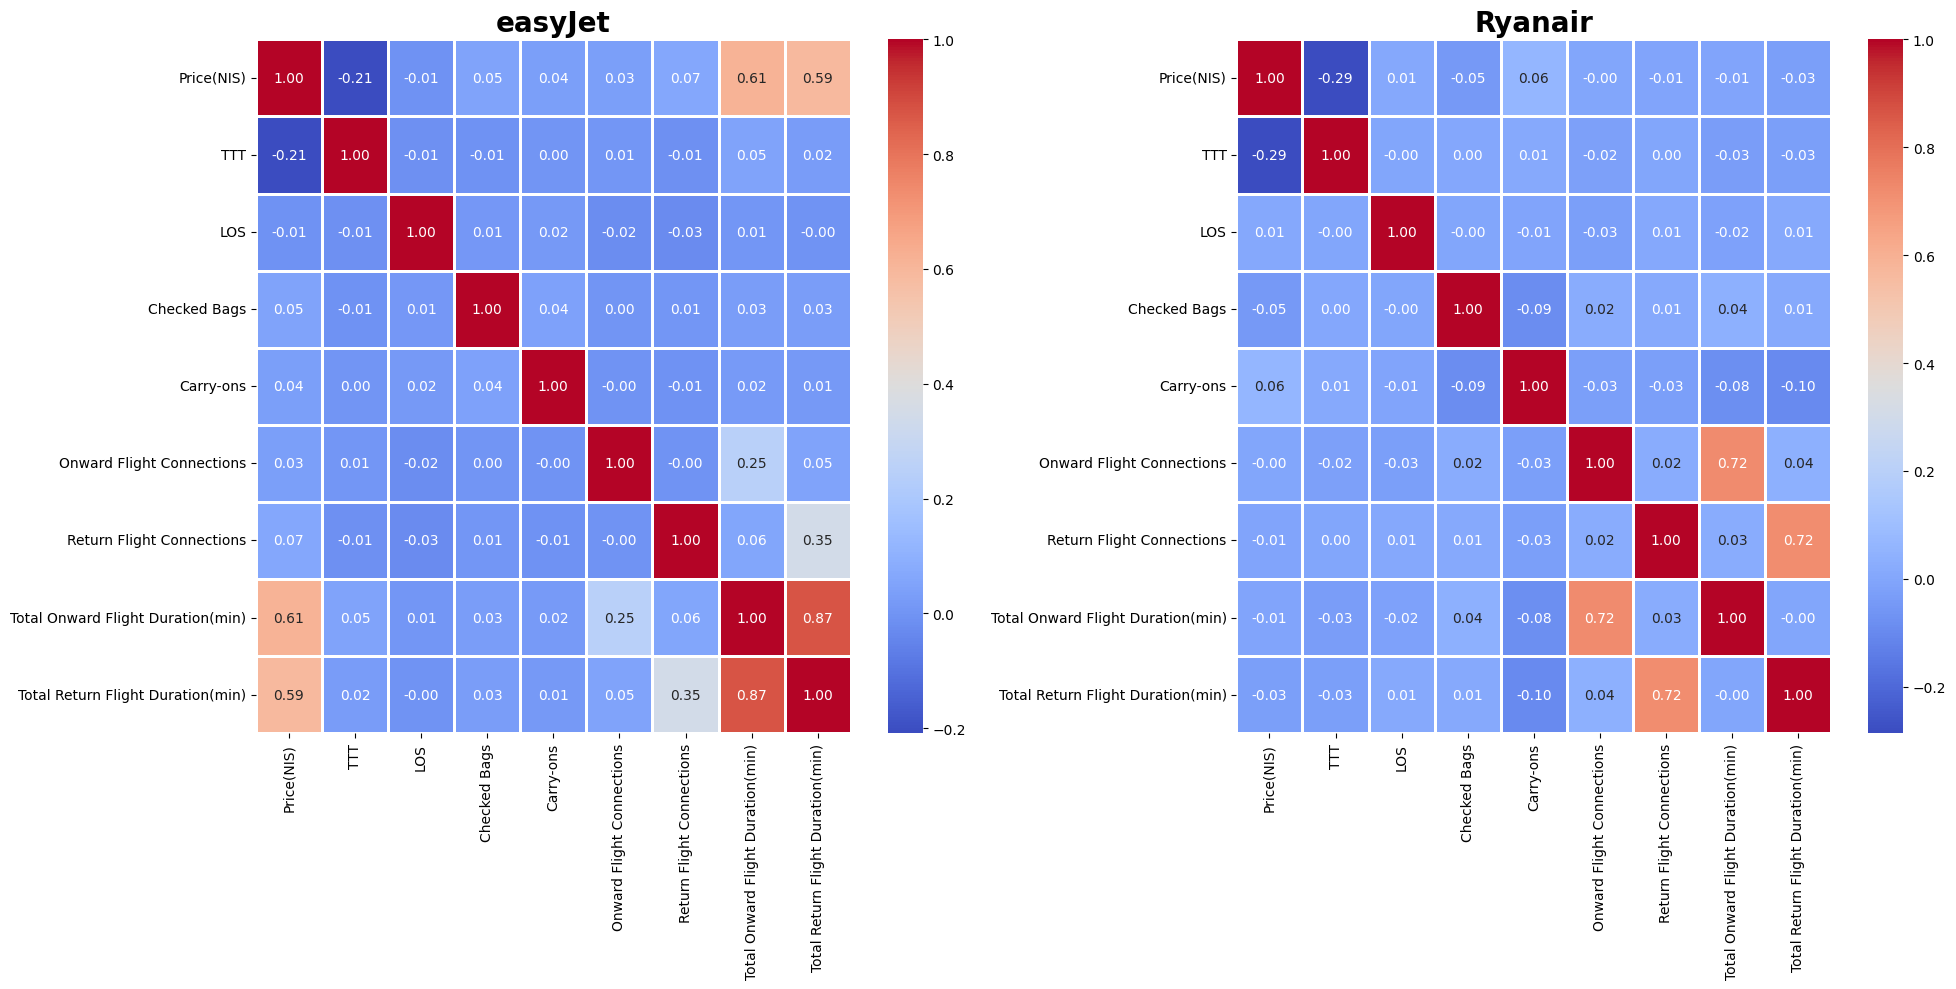

In [367]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(easyJet.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('easyJet', fontsize=20, fontweight='bold')
sns.heatmap(ryanair.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Ryanair', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

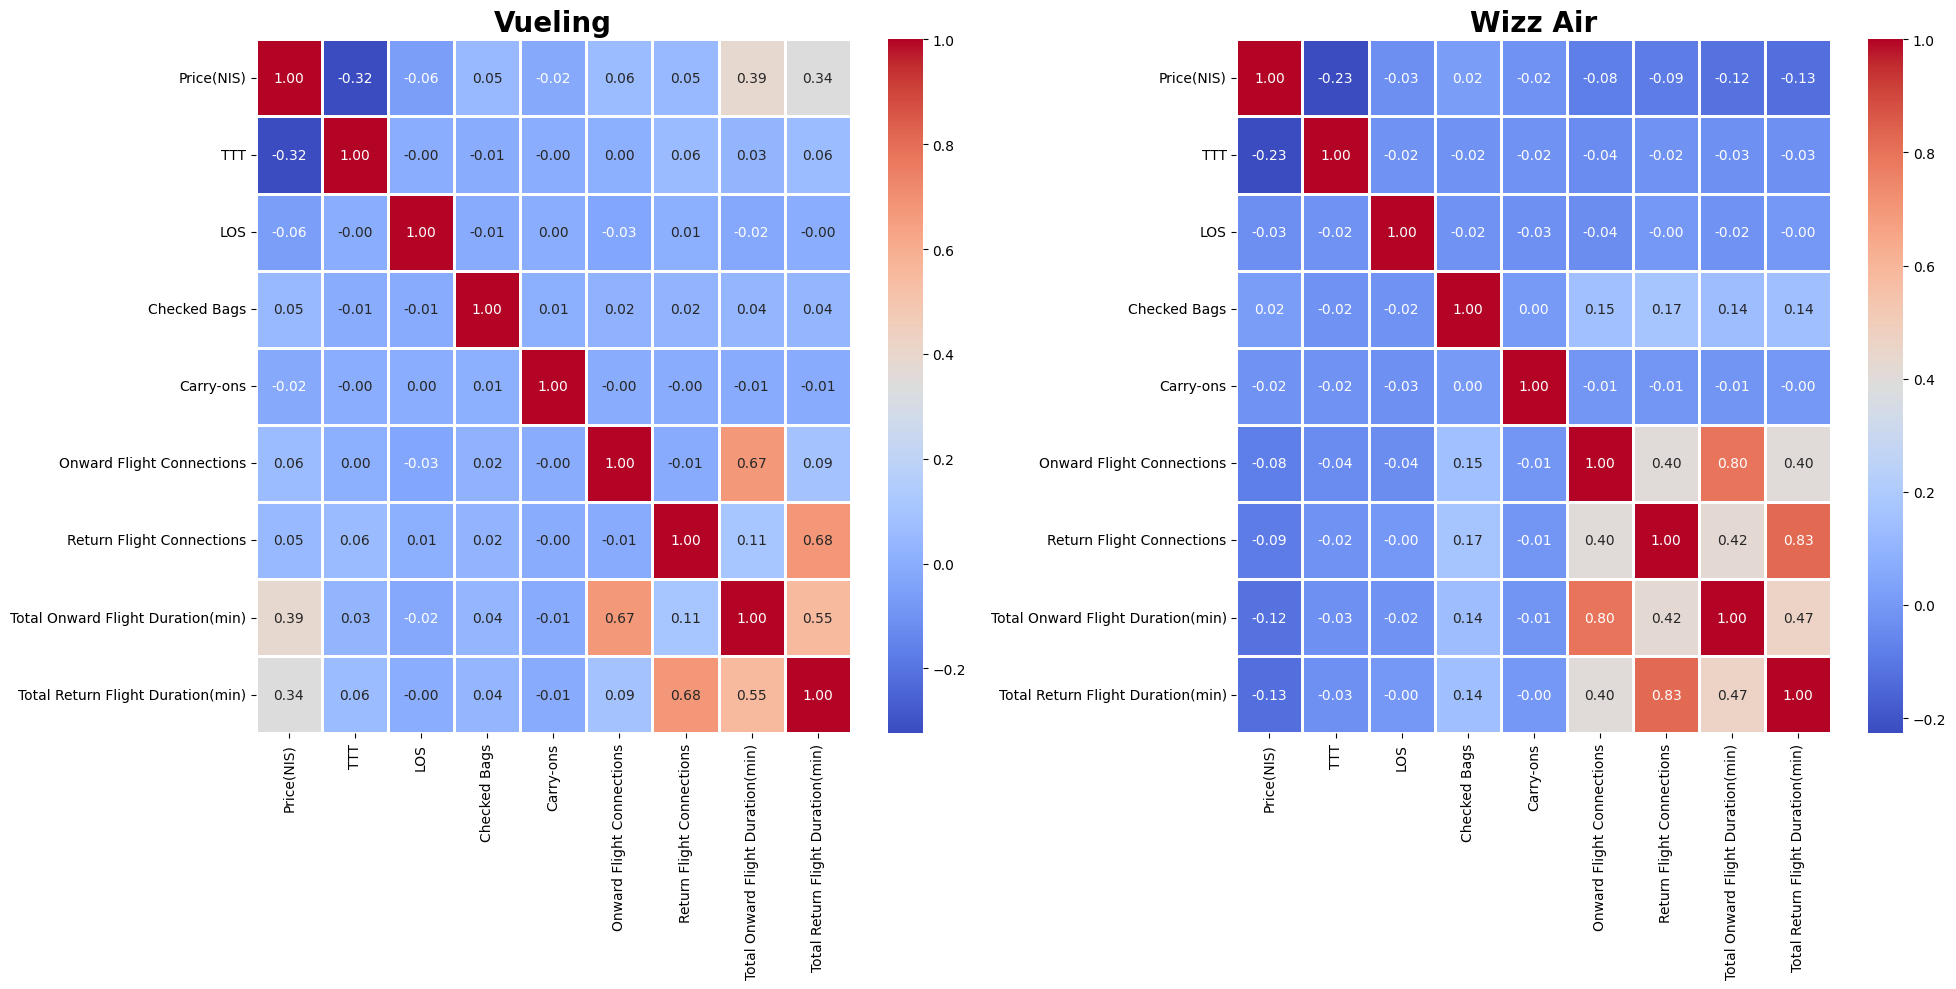

In [368]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(vueling.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Vueling', fontsize=20, fontweight='bold')
sns.heatmap(wizzAir.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Wizz Air', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

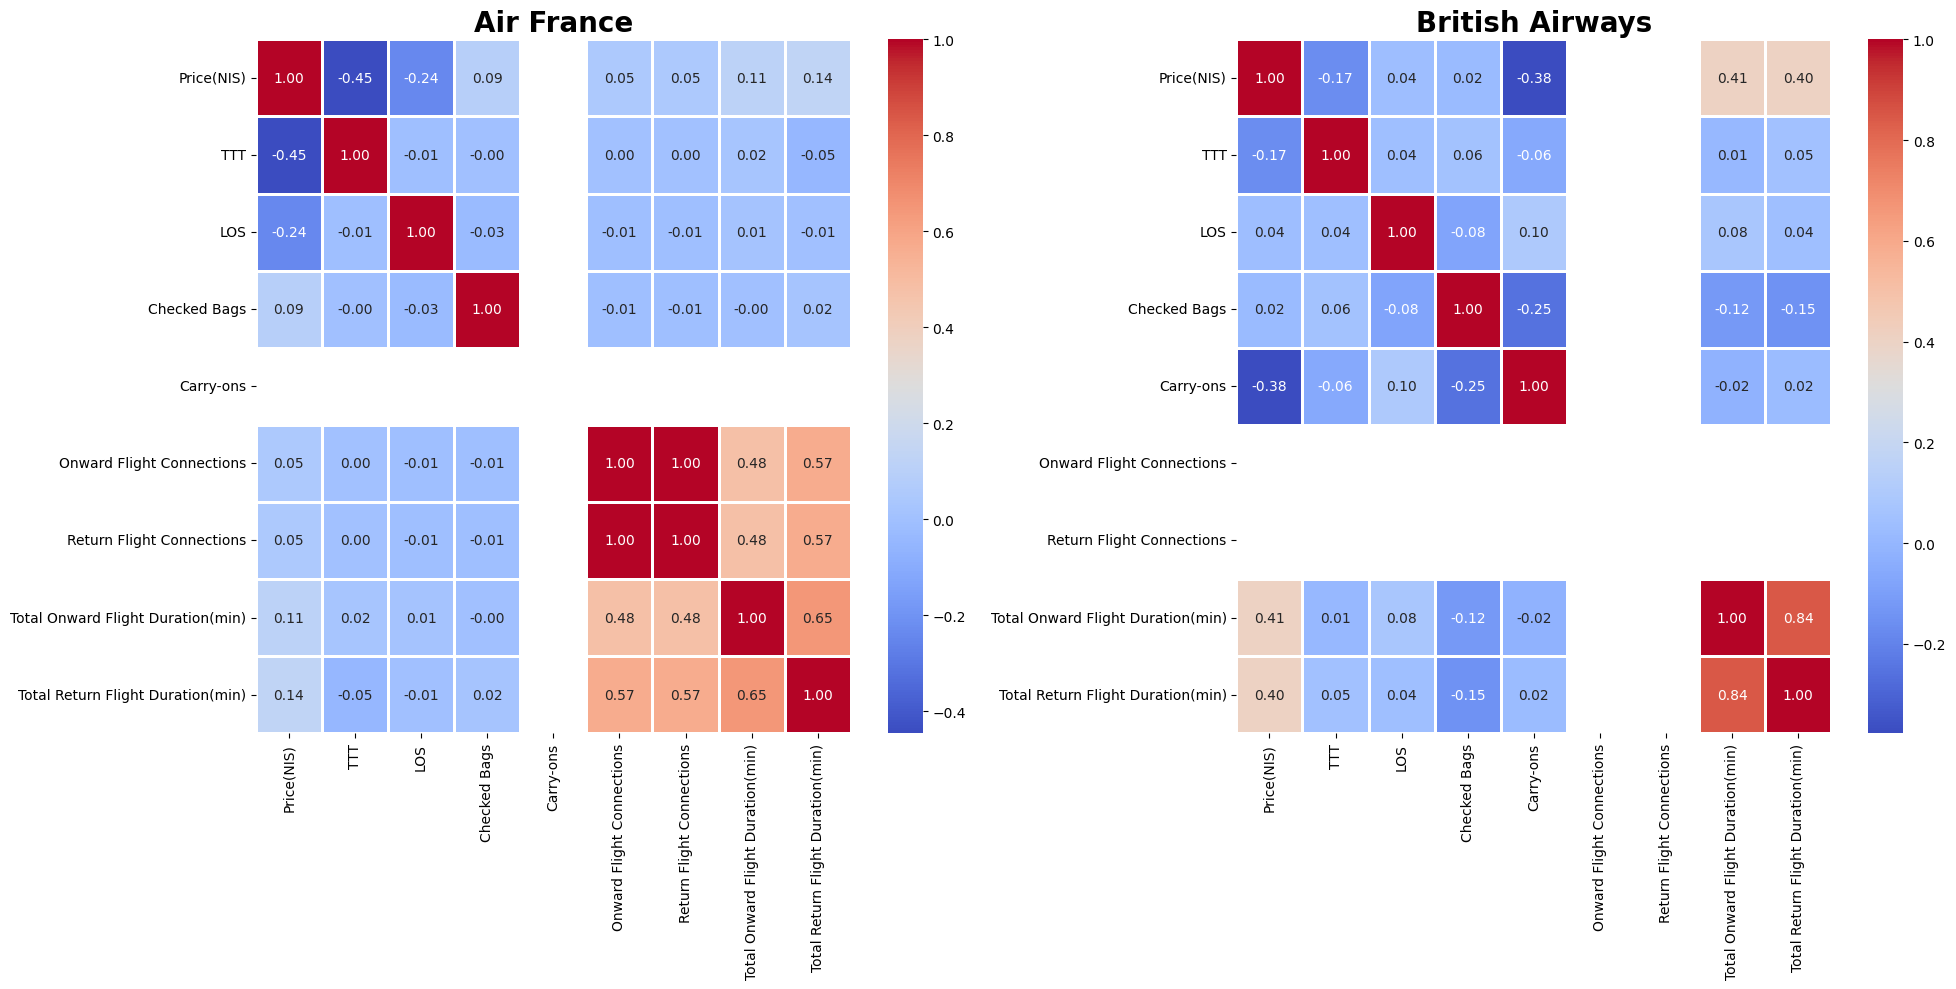

In [369]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(airFrance.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('Air France', fontsize=20, fontweight='bold')
sns.heatmap(britishAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('British Airways', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

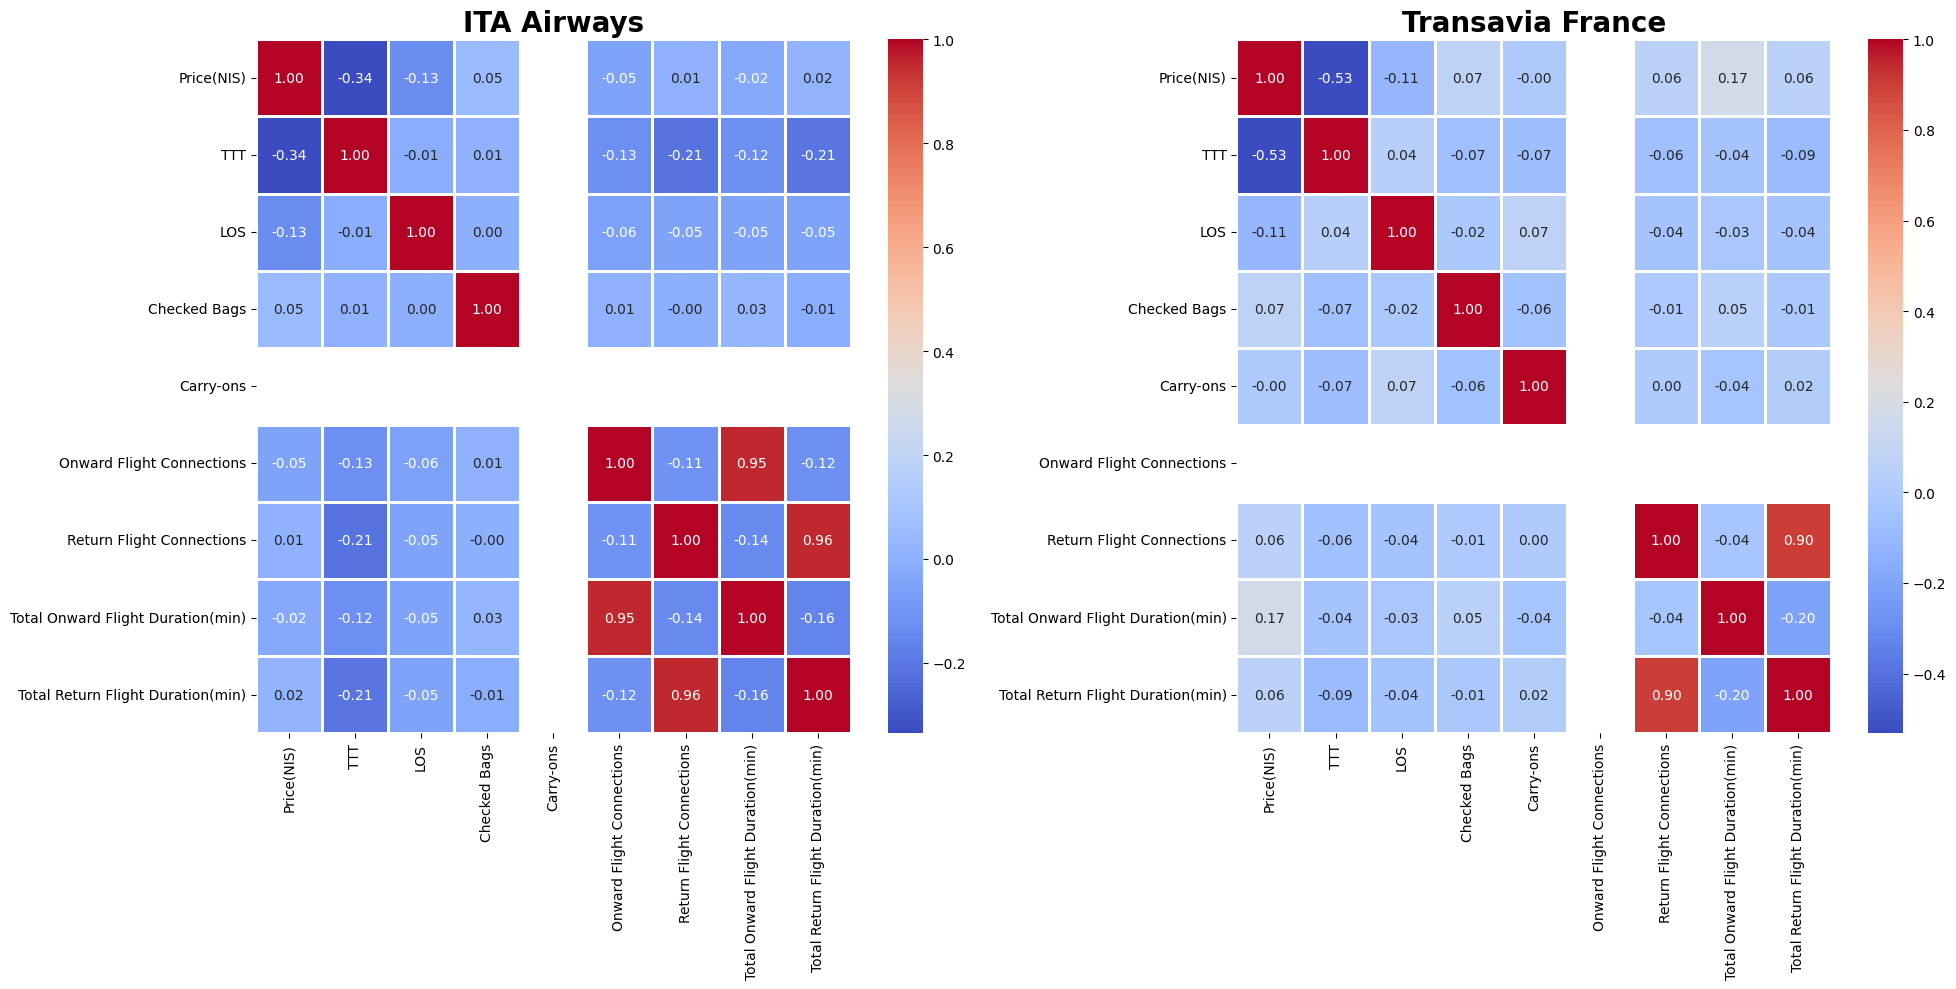

In [370]:
fix, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(itaAirways.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[0])
axes[0].set_title('ITA Airways', fontsize=20, fontweight='bold')
sns.heatmap(transavia.corr(), annot=True, cmap='coolwarm', fmt='.2f',linewidths=2, ax=axes[1])
axes[1].set_title('Transavia France', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [371]:
'''Metrics to consider following correlation check:
- Total Onward Flight Duration
- Total Return Flight Duration
- TTT
- LOS
- Carry-ons'''

'Metrics to consider following correlation check:\n- Total Onward Flight Duration\n- Total Return Flight Duration\n- TTT\n- LOS\n- Carry-ons'

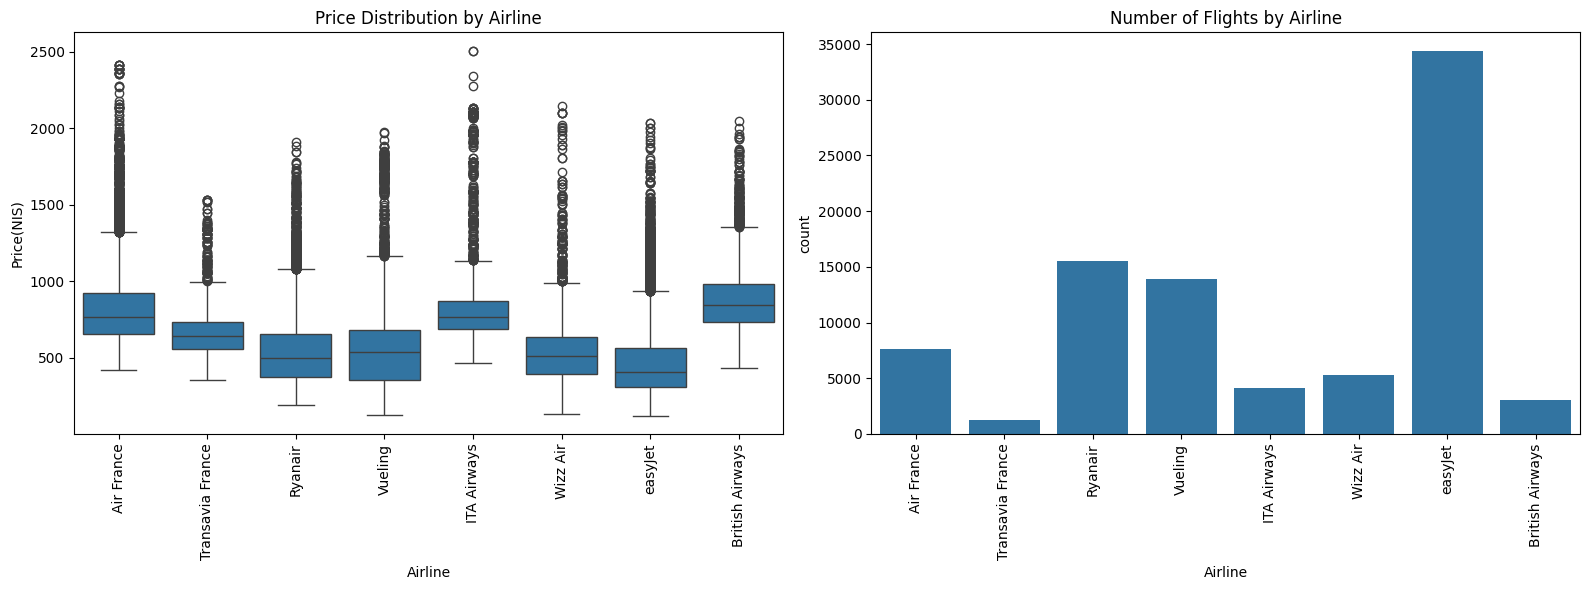

In [372]:
# checking the distribution of the price by airline and the number of flights by airline
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot price distribution by airline (box plot)
sns.boxplot(data=df_filtered, x='Airline', y='Price(NIS)', ax=axes[0])
axes[0].set_title('Price Distribution by Airline')
axes[0].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

# Plot number of flights by airline (count plot)
sns.countplot(data=df_filtered, x='Airline', ax=axes[1])
axes[1].set_title('Number of Flights by Airline')
axes[1].tick_params(axis='x', rotation=90)  # Rotate airline names for better visibility

plt.tight_layout()
plt.show()

In [373]:
'''a pricing policy could be the more flights an airline has, the lower the price for each flight'''
# Transavia France is an exception due to the low number of flights - can be considered as an outlier

'a pricing policy could be the more flights an airline has, the lower the price for each flight'

In [374]:
'''also check:
avg/mean price per airline
price variance/std-v per each airline

'''

'also check:\navg/mean price per airline\nprice variance/std-v per each airline\n\n'

In [376]:
df_cluster = df_filtered.groupby('Airline').agg(
    avgOnwardFlightDurationMin = ('Total Onward Flight Duration(min)', 'mean'),
    avgReturnFlightDurationMin= ('Total Return Flight Duration(min)', 'mean'),
    avgTTT = ('TTT', 'mean'),
    avgLOS = ('LOS', 'mean'),
    avgCarryOns = ('Carry-ons', 'mean'),
    avgPrice = ('Price(NIS)', 'mean'),
    priceStd = ('Price(NIS)', 'std'),
)
df_cluster

,avgOnwardFlightDurationMin,avgReturnFlightDurationMin,avgTTT,avgLOS,avgCarryOns,avgPrice,priceStd
Airline,,,,,,,
Air France,127.404429,127.914579,12.675191,3.409175,1.000000,851.589639,298.167013
British Airways,149.017740,148.134034,12.190210,3.036465,0.682983,891.395204,241.510035
ITA Airways,139.648597,142.018470,14.757976,2.899976,1.000000,837.912449,280.988850
Ryanair,154.703897,155.003472,15.632330,3.000900,0.112269,543.843107,230.131833
Transavia France,129.775510,130.302041,16.607347,3.014694,0.985306,690.466939,210.518545
Vueling,114.754955,115.230631,15.583712,2.956252,0.001514,552.671495,251.353568
Wizz Air,160.911737,160.929577,16.126573,3.032488,0.004883,542.656901,214.822835
easyJet,89.897641,89.753203,14.730693,2.979441,0.015084,455.070443,196.201744


([0], [Text(0, 0, '')])

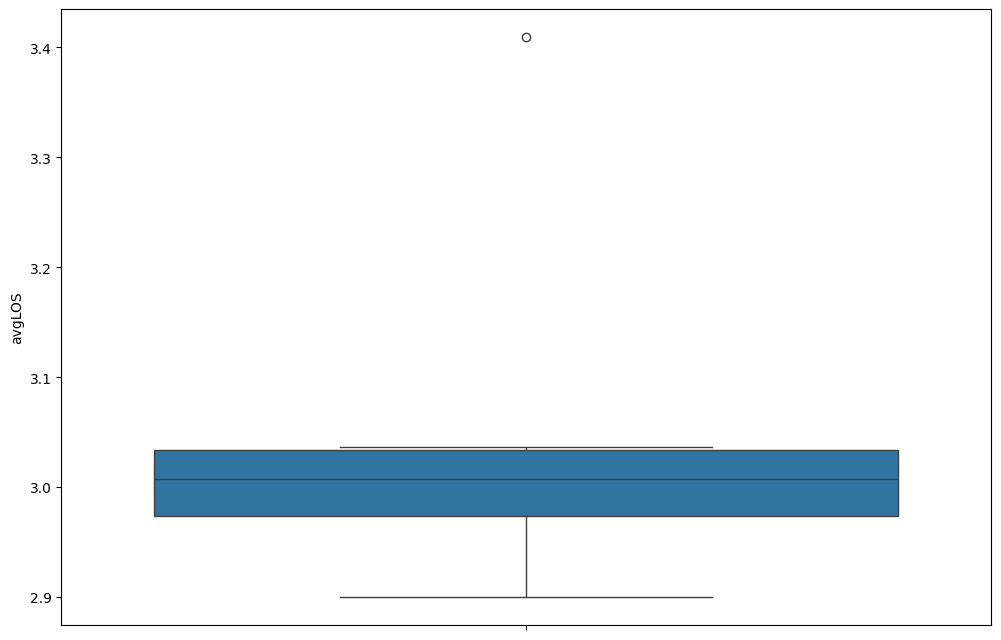

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster['avgLOS'])
plt.xticks(rotation=40)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print(df_scaled)

[[-0.26948263 -0.26399064 -1.42185472  2.53338543  1.15783402  1.13641712
   1.74867498  0.36794903]
 [ 0.72446396  0.66493165 -1.74823119 -0.03241594  0.45834569  1.3864918
   0.03176518  1.79045477]
 [ 0.29359856  0.38397036 -0.02020816 -0.97203238  1.15783402  1.05049147
   1.228115   -1.2502105 ]
 [ 0.98595728  0.98052741  0.5682043  -0.27725173 -0.80091786 -0.79697123
  -0.31303515 -1.13361791]
 [-0.16044205 -0.15430588  1.22435901 -0.18229356  1.12541243  0.12417906
  -0.90738818  0.85412823]
 [-0.85120294 -0.84671668  0.5354856  -0.58461643 -1.04529533 -0.74150772
   0.33005958  0.56526663]
 [ 1.27144162  1.25278457  0.90081354 -0.05979375 -1.03786148 -0.80442345
  -0.77695275 -0.44057941]
 [-1.9943338  -2.01720078 -0.03856838 -0.42498163 -1.01535148 -1.35467706
  -1.34123866 -0.75339085]]


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

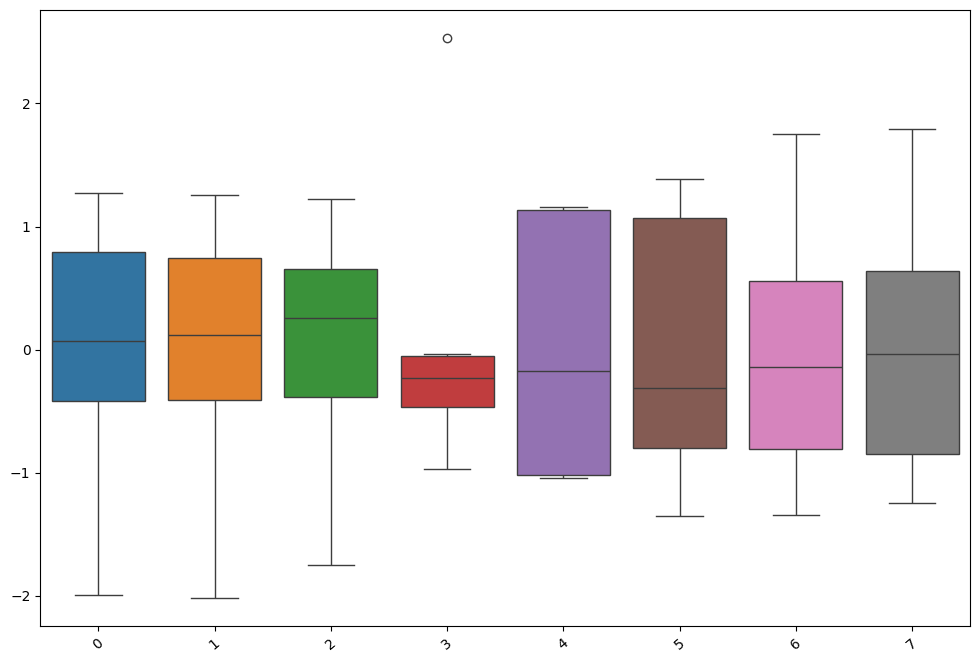

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df_scaled)
plt.xticks(rotation=40)

In [ ]:
outliers = []
for feature in df_cluster.columns:
    Q1 = np.percentile(df_cluster[feature],25)
    Q3 = np.percentile(df_cluster[feature],75)
    step = (Q3-Q1)*1.5
    outliers_pts = df_cluster[~((df_cluster[feature]>=Q1-step) & (df_cluster[feature]<=Q3+step))]
    outliers.extend(outliers_pts.index)

    print('Airlines considered outliers for the feature %s are:' %feature)
    print(outliers_pts.index)
    print()

Airlines considered outliers for the feature avgOnwardFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgReturnFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgTTT are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgLOS are:
Index(['Air France'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgCarryOns are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgPrice are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature priceStd are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgFlightDepartureTime are:
Index([], dtype='object', name='Airline')



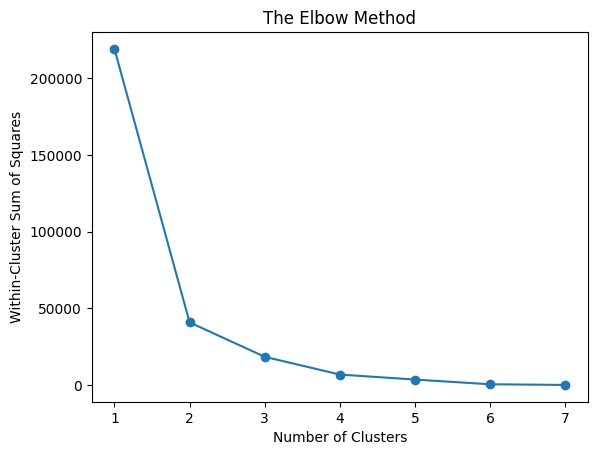

In [ ]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

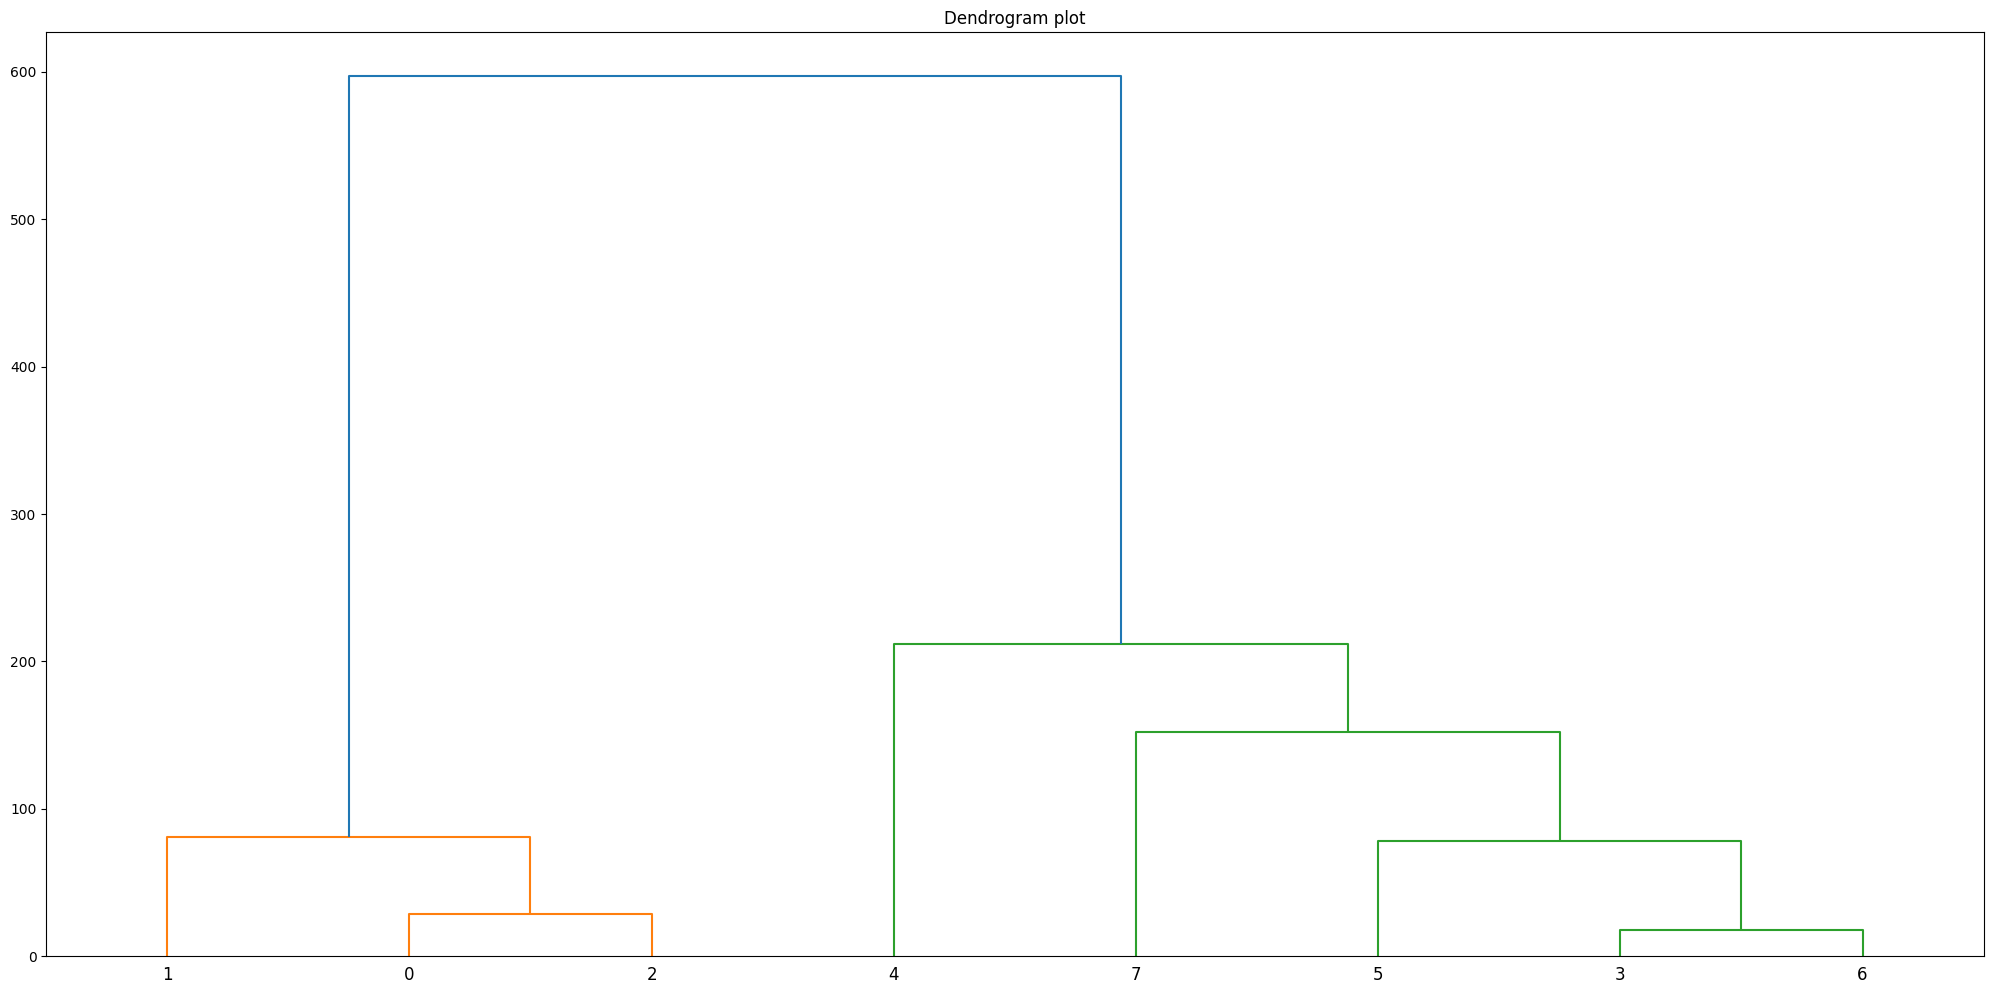

In [ ]:
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(df_cluster,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [ ]:
for i in range(2,8):
    X = df_cluster.values
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(X)
    print(f'{i} clusters silhouette score is {silhouette_score(X,y_kmeans)}')

2 clusters silhouette score is 0.6129667172247734
3 clusters silhouette score is 0.501288472885479
4 clusters silhouette score is 0.4818307790621045
5 clusters silhouette score is 0.4439030219067163
6 clusters silhouette score is 0.3330644892340049
7 clusters silhouette score is 0.18461104085016317


In [ ]:
# clustering
X = df_cluster.values
labels = df_cluster.index

num_of_clusters = 2

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# dimensionality reduction
pca = PCA(n_components=2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.94946652, 0.0316299 ])

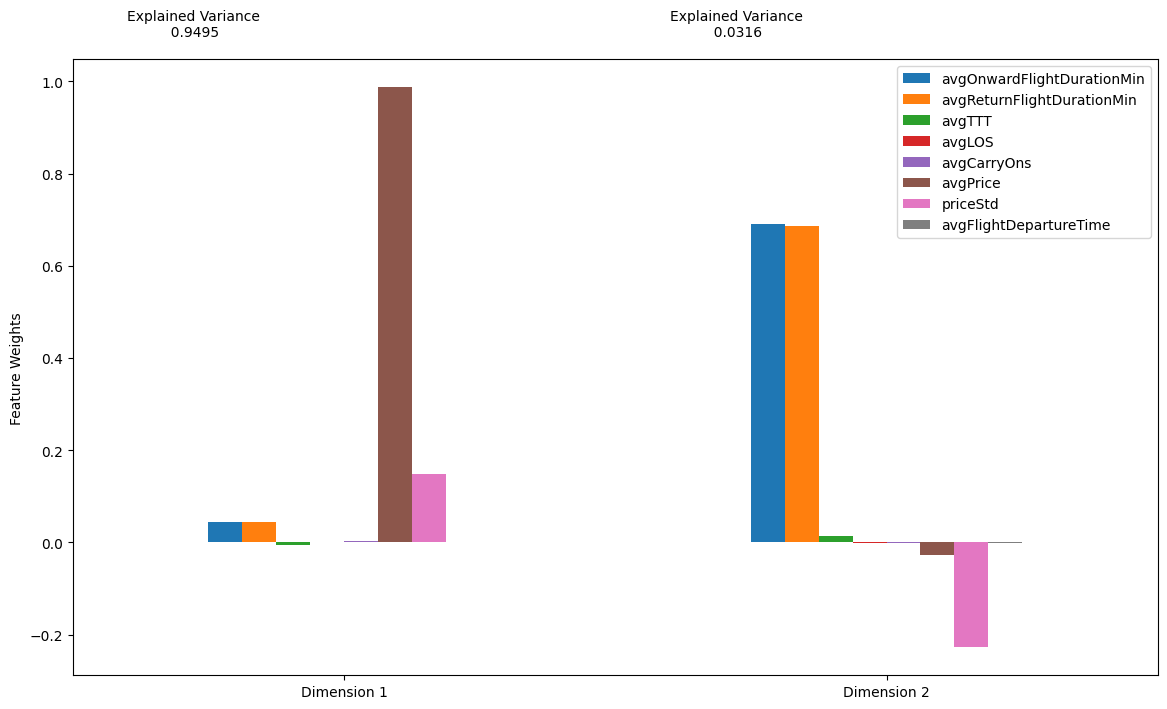

In [ ]:
pca_results = vs.pca_results(df_cluster,pca)

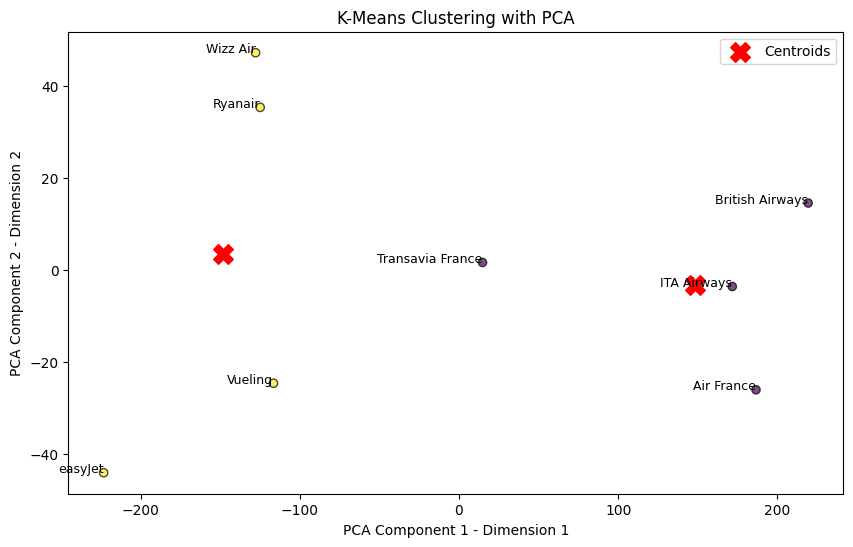

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component 1 - Dimension 1")
ax.set_ylabel("PCA Component 2 - Dimension 2")
ax.legend()

plt.show()